In [0]:
# Descargamos los clasificadores ya entrenados.
!wget https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/keras_models/clasificador-modelos.h5
!wget https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/keras_models/clasificador-caras.h5

--2019-06-01 12:42:13--  https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/keras_models/clasificador-modelos.h5
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/keras_models/clasificador-modelos.h5 [following]
--2019-06-01 12:42:13--  https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/keras_models/clasificador-modelos.h5
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33287736 (32M) [application/octet-stream]
Saving to: ‘clasificador-modelos.h5’

clasificador-modelo 100%[===================>]  31.75M   119MB/s    in 0.3s    

20

In [0]:
!ls

clasificador-caras.h5  clasificador-modelos.h5	sample_data


In [0]:
# Cargamos los modelos
from keras.models import load_model

calsificador_modelos = load_model('clasificador-modelos.h5')
calsificador_caras = load_model('clasificador-caras.h5')

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [0]:
# Clasifica una imagen en función de si encuentr aun modelo o no con ayuda de calsificador previamente entrenado:
# 0 --> Modelo
# 1 --> Sin modelo

def model_finder(image):
    predictions = calsificador_modelos.predict(image)[0]
    return int(predictions.argmax())

In [0]:
# Clasifica una imagen en función de si encuentra una cara o no con ayuda de calsificador previamente entrenado:
# 0 --> Cara
# 1 --> Sin cara

def face_finder(image):
    predictions = calsificador_caras.predict(image)[0]
    return int(predictions.argmax())

In [0]:
import cv2
import numpy as np
from keras.preprocessing.image import img_to_array

def evaluate(image_dir):

    # load the image
    image = cv2.imread(image_dir)
    original = image.copy()

    # pre-process the image for classification
    image = cv2.resize(image, (28, 28))
    image = image.astype("float") / 255.0
    image = img_to_array(image)
    image = np.expand_dims(image, axis=0)
    
    prediction = model_finder(image)
    
    final_prediction = ''
    
    if prediction is 1:
        final_prediction = "Sin modelo"
    else:
        if face_finder(image) is 0:
            final_prediction = "Modelo con cara"
        else:
            final_prediction = "Modelo sin cara"
        
#     print("Predicción: ", final_prediction)
    
#     peq = cv2.resize(original, (500, 500))
#     cv2_imshow(peq)
    
    return final_prediction

In [0]:
# Descargamos el archivos JSON que contiene los productos a clasificar.
!wget https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/outputs/1K-Male-Female-PRODUCTS.json

--2019-06-01 12:42:33--  https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/outputs/1K-Male-Female-PRODUCTS.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 341493 (333K) [text/plain]
Saving to: ‘1K-Male-Female-PRODUCTS.json’

1K-Male-Female-PROD 100%[===================>] 333.49K  --.-KB/s    in 0.05s   

2019-06-01 12:42:33 (6.45 MB/s) - ‘1K-Male-Female-PRODUCTS.json’ saved [341493/341493]



In [0]:
import json, requests
from PIL import Image
from io import BytesIO

# Descargamos las imagenes para poder procesarlas.

# Recorrer el json y por cada asin descargar la primera url y asociarla a su asin (nombre de la imagen descargada).
def requestImg(image_name, url):
    r = requests.get(url)
    img = Image.open(BytesIO(r.content))
    img.save("image_folder/" + image_name)
    
def downloadImage():
    with open('1K-Male-Female-PRODUCTS.json', 'r') as f:
        data = json.load(f)
        
    for i in range(len(data)):
        try:
            url = data[i]['image_urls'][0]
            asin = data[i]['asin']
            image_name = asin + '.jpg'
            requestImg(image_name, url)
        except IndexError:
            print('Error con el producto ' +  str(i + 1) + ', continuando...')
            continue
        
    f.close()

In [0]:
!mkdir image_folder

In [0]:
downloadImage()

Error con el producto 126, continuando...
Error con el producto 456, continuando...
Error con el producto 563, continuando...


In [0]:
!ls image_folder/

Predicción: Modelo con cara


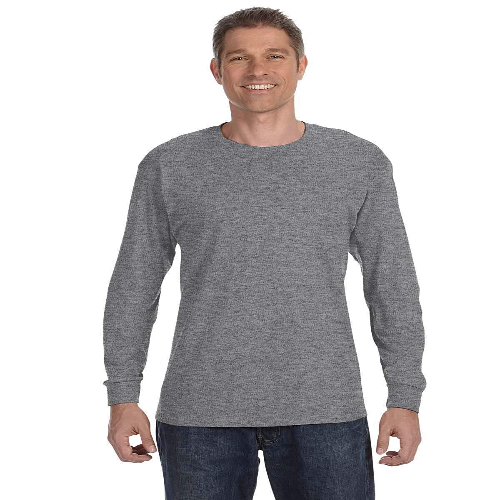

In [0]:
########### PRUEBA MANUAL ###########
from google.colab.patches import cv2_imshow

image_dir = 'image_folder/B00BJMBSBS.jpg'
pred = evaluate(image)

print('Predicción: '+ pred)

image = cv2.imread(image_dir)
peq = cv2.resize(image, (500, 500))
cv2_imshow(peq)

In [0]:
# Descargamos la base de datos para poder trabajar sobre ella.
!wget https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/databases/1K-Male-Female-DB.db

--2019-06-01 12:47:44--  https://github.com/daniarnaizg/TFG-Amazon-Scraper/raw/master/databases/1K-Male-Female-DB.db
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/databases/1K-Male-Female-DB.db [following]
--2019-06-01 12:47:44--  https://raw.githubusercontent.com/daniarnaizg/TFG-Amazon-Scraper/master/databases/1K-Male-Female-DB.db
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2396160 (2.3M) [application/octet-stream]
Saving to: ‘1K-Male-Female-DB.db’

1K-Male-Female-DB.d 100%[===================>]   2.29M  --.-KB/s    in 0.09s   

2019-06-01 12:47:44 (25

In [0]:
# Creación de la tabla PREDICTIONS en la base de datos actual-
# También sería posible añadir este campo a la tabla MAIN_AMAZON en vez de crear una nueva tabla.
# Esta tabla se crea con vistas al futuro, como por ejemplo clasificar todas las imagenes de un prodcuto en vez de la principal.

import sqlite3

def createTables(curr):
        # self.dropAmazonTables()
        curr.execute("""CREATE TABLE IF NOT EXISTS PREDICTIONS(
                        asin TEXT FOREING KEY NOT NULL,
                        prediction TEXT
                        )""")
        
        
def storePredictionInDb(curr, conn, item):
    curr.execute("""INSERT INTO PREDICTIONS VALUES( ?, ?)""",(
        item['asin'],
        item['prediction']
        ))
    conn.commit()
    
    
def closeDB(conn):
    conn.close()

In [0]:
# Las lineas comentadas son para sacar un archivo JSON con las predicciones

import json, glob
def savePredictions(curr, conn):
    
#     data = []
    
    for imagePath in glob.glob('image_folder/*.jpg'):
        item = {}
        item['asin'] = imagePath[13:23]
        item['prediction'] = evaluate(imagePath)
        
        storePredictionInDb(curr, conn, item)
        
#         data.append(item)
#     with open('output.json', 'w') as output:
#         json.dump(data, output)

In [0]:
# Creamos la conexión con la base de datos
conn = sqlite3.connect('1K-Male-Female-DB.db')
curr = conn.cursor()

# Creamos la tabla
createTables(curr)

# Guardamos la predicción en la tabla asociando cada una al ASIN del producto
savePredictions(curr, conn)

# Cerramos la conexión con la base de datos
closeDB(conn)

In [0]:
# Descargamos las base de datos actualizada en caso de que sea necesario
from google.colab import files
files.download('1K-Male-Female-DB.db')

In [0]:
# A continuación generamos un documento excel con las tablas de la base de datos

# Conectamos con la base de datos de nuevo
conn = sqlite3.connect('1K-Male-Female-DB.db')

# Generamos un dataframe con cada tabla de la abse de datos
import pandas as pd

main_df = pd.read_sql_query("SELECT * FROM MAIN_AMAZON", conn)
images_df = pd.read_sql_query("SELECT * FROM IMAGE_URLS", conn)
comments_df = pd.read_sql_query("SELECT * FROM COMMENTS", conn)
predictions_df = pd.read_sql_query("SELECT * FROM PREDICTIONS", conn)

In [0]:
main_df.head()

,asin,sex,rating,description,reviews,brand,price_range
0,B00KV9IY6M,Male,4.3,4.2 oz. 100% combed and ringspun cotton. 30 si...,97,Bella,$3.99 - $27.37
1,B077ZMKWVM,Male,4.3,Gildan crew t-shirts are the ultimate in comfo...,1921,Gildan,$12.97 - $69.90
2,B0000ANHT7,Male,4.5,Carhartt short sleeve work wear pocket t-shirt...,4150,Carhartt,$12.99 - $71.94
3,B07BB7Y6Z7,Male,4.1,Fruit of the Loom men's crews work great alone...,9855,Fruit-of-the-Loom,$14.04 - $65.84
4,B016EAQ42W,Male,3.8,Red label tag less comfort soft crewneck under...,1091,Hanes,$15.98 - $141.14


In [0]:
images_df.head()

,asin,url
0,B00KV9IY6M,https://images-na.ssl-images-amazon.com/images...
1,B00KV9IY6M,https://images-na.ssl-images-amazon.com/images...
2,B077ZMKWVM,https://images-na.ssl-images-amazon.com/images...
3,B077ZMKWVM,https://images-na.ssl-images-amazon.com/images...
4,B0000ANHT7,https://images-na.ssl-images-amazon.com/images...


In [0]:
comments_df.head()

,asin,comment
0,B077ZMKWVM,"I'm used to Hanes shirts, and these are very c..."
1,B077ZMKWVM,bad! bad! bad! Very bad quality under-shirts w...
2,B077ZMKWVM,You are looking at these because you want some...
3,B077ZMKWVM,So the price was right. Hard to complain when ...
4,B077ZMKWVM,"The shirts are comfortable, but the quality co..."


In [0]:
predictions_df.head()

,asin,prediction
0,B06X6NPH92,Sin modelo
1,B074LWHBFP,Sin modelo
2,B00CEH0MSM,Sin modelo
3,B07P9H26RN,Sin modelo
4,B07LGF1VQ8,Sin modelo


In [0]:
# Hacer un merge del dataframen predictions con el dataframe principal para añadir el campo 'predicción'
merged_df = pd.merge(main_df, predictions_df, on='asin')
merged_df.head()

,asin,sex,rating,description,reviews,brand,price_range,prediction
0,B077ZMKWVM,Male,4.3,Gildan crew t-shirts are the ultimate in comfo...,1921,Gildan,$12.97 - $69.90,Sin modelo
1,B0000ANHT7,Male,4.5,Carhartt short sleeve work wear pocket t-shirt...,4150,Carhartt,$12.99 - $71.94,Modelo con cara
2,B07BB7Y6Z7,Male,4.1,Fruit of the Loom men's crews work great alone...,9855,Fruit-of-the-Loom,$14.04 - $65.84,Sin modelo
3,B016EAQ42W,Male,3.8,Red label tag less comfort soft crewneck under...,1091,Hanes,$15.98 - $141.14,Modelo con cara
4,B07KCH442C,Male,4.0,Upgrade your tee collection with our classic c...,273,Champion LIFE,$11.25 - $39.50,Modelo con cara


In [0]:
# Añadir la url del producto en un nuevo campo llamardo url
# Se sacará a partir del asin
# https://www.amazon.com/dp/[ASIN]/

merged_df['url'] = merged_df.apply(lambda row: 'https://www.amazon.com/dp/' + row.asin + '/', axis=1)

merged_df.head()

,asin,sex,rating,description,reviews,brand,price_range,prediction,url
0,B077ZMKWVM,Male,4.3,Gildan crew t-shirts are the ultimate in comfo...,1921,Gildan,$12.97 - $69.90,Sin modelo,https://www.amazon.com/dp/B077ZMKWVM/
1,B0000ANHT7,Male,4.5,Carhartt short sleeve work wear pocket t-shirt...,4150,Carhartt,$12.99 - $71.94,Modelo con cara,https://www.amazon.com/dp/B0000ANHT7/
2,B07BB7Y6Z7,Male,4.1,Fruit of the Loom men's crews work great alone...,9855,Fruit-of-the-Loom,$14.04 - $65.84,Sin modelo,https://www.amazon.com/dp/B07BB7Y6Z7/
3,B016EAQ42W,Male,3.8,Red label tag less comfort soft crewneck under...,1091,Hanes,$15.98 - $141.14,Modelo con cara,https://www.amazon.com/dp/B016EAQ42W/
4,B07KCH442C,Male,4.0,Upgrade your tee collection with our classic c...,273,Champion LIFE,$11.25 - $39.50,Modelo con cara,https://www.amazon.com/dp/B07KCH442C/


In [0]:
##################### TEMPORAL: DIVIDIR EL CAMPO price_range EN DOS CAMPOS min_price y max_price
# EN EL FUTURO ESOS CAMPOS VENDRÁN SEPARADOS DESDE EL PRINCIPIO

def get_min_price(price_range):
    min = re.findall(r'\$(.*?)\ ', price_range)
#     print(min)
    if len(min) is 0:
        return re.findall(r'(?<=\$).+$', price_range)
    return min

def get_max_price(price_range):
    max = re.findall(r'(?<= \$).+$', price_range)
#     print(max)
    if len(max) is 0:
        return re.findall(r'(?<=\$).+$', price_range)
    return max

merged_df['min_price'] = merged_df.apply(lambda row: get_min_price(row.price_range)[0], axis=1)
merged_df['max_price'] = merged_df.apply(lambda row: get_max_price(row.price_range)[0], axis=1)
merged_df.head()

,asin,sex,rating,description,reviews,brand,price_range,prediction,url,min_price,max_price
0,B077ZMKWVM,Male,4.3,Gildan crew t-shirts are the ultimate in comfo...,1921,Gildan,$12.97 - $69.90,Sin modelo,https://www.amazon.com/dp/B077ZMKWVM/,12.97,69.90
1,B0000ANHT7,Male,4.5,Carhartt short sleeve work wear pocket t-shirt...,4150,Carhartt,$12.99 - $71.94,Modelo con cara,https://www.amazon.com/dp/B0000ANHT7/,12.99,71.94
2,B07BB7Y6Z7,Male,4.1,Fruit of the Loom men's crews work great alone...,9855,Fruit-of-the-Loom,$14.04 - $65.84,Sin modelo,https://www.amazon.com/dp/B07BB7Y6Z7/,14.04,65.84
3,B016EAQ42W,Male,3.8,Red label tag less comfort soft crewneck under...,1091,Hanes,$15.98 - $141.14,Modelo con cara,https://www.amazon.com/dp/B016EAQ42W/,15.98,141.14
4,B07KCH442C,Male,4.0,Upgrade your tee collection with our classic c...,273,Champion LIFE,$11.25 - $39.50,Modelo con cara,https://www.amazon.com/dp/B07KCH442C/,11.25,39.50


In [0]:
final_df = merged_df.drop('price_range', axis=1)
final_df = final_df[['asin', 'sex', 'rating', 'description', 'reviews', 'brand', 'min_price', 'max_price', 'prediction', 'url']]
final_df.head()

,asin,sex,rating,description,reviews,brand,min_price,max_price,prediction,url
0,B077ZMKWVM,Male,4.3,Gildan crew t-shirts are the ultimate in comfo...,1921,Gildan,12.97,69.90,Sin modelo,https://www.amazon.com/dp/B077ZMKWVM/
1,B0000ANHT7,Male,4.5,Carhartt short sleeve work wear pocket t-shirt...,4150,Carhartt,12.99,71.94,Modelo con cara,https://www.amazon.com/dp/B0000ANHT7/
2,B07BB7Y6Z7,Male,4.1,Fruit of the Loom men's crews work great alone...,9855,Fruit-of-the-Loom,14.04,65.84,Sin modelo,https://www.amazon.com/dp/B07BB7Y6Z7/
3,B016EAQ42W,Male,3.8,Red label tag less comfort soft crewneck under...,1091,Hanes,15.98,141.14,Modelo con cara,https://www.amazon.com/dp/B016EAQ42W/
4,B07KCH442C,Male,4.0,Upgrade your tee collection with our classic c...,273,Champion LIFE,11.25,39.50,Modelo con cara,https://www.amazon.com/dp/B07KCH442C/


In [0]:
# El siguiente paso será exportar los dataframes a un documento excel.

# Herramienta apra escribir en formato xlsx
!pip install XlsxWriter

     |████████████████████████████████| 143kB 2.9MB/s 


In [0]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('1K-Male-Female-EXCEL.xlsx', engine='xlsxwriter')

In [0]:
# Write each dataframe to a different worksheet.
final_df.to_excel(writer, index=False, sheet_name='Productos')
images_df.to_excel(writer, index=False, sheet_name='Imagenes')
comments_df.to_excel(writer, index=False, sheet_name='Comentarios')

In [0]:
# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [0]:
!ls

1K-Male-Female-DB.db	      clasificador-caras.h5    sample_data
1K-Male-Female-EXCEL.xlsx     clasificador-modelos.h5
1K-Male-Female-PRODUCTS.json  image_folder


In [0]:
# Descargamos el documento creado
files.download('1K-Male-Female-EXCEL.xlsx')